## **EJ8_Matplotlib** - Álvaro Fernandez Becerra


#### 6.	(ENTREGA) Dibuja un gráfico para mostrar las temperaturas de todos los días del año agrupadas por meses. Para ello:
- a.	Generar un fichero temperaturas txt en el que generes temperaturas de manera aleatoria para los días de todos los meses del año, con variabilidad según las estaciones:

        i.	Invierno de 0 a 18 ºC
        ii.	Primavera de 10 a 25 ºC
        iii. Verano de 22 a 40 ºC
        iv.	Otoño de 15 a 28 ºC

- b.	Lee los datos del fichero que acabas de generar y dibuja un gráfico con una línea para cada uno de los meses y sus temperaturas

        i.	Invierno de 0 a 18 ºC
        ii.	Primavera de 10 a 25 ºC
        iii. Verano de 22 a 40 ºC


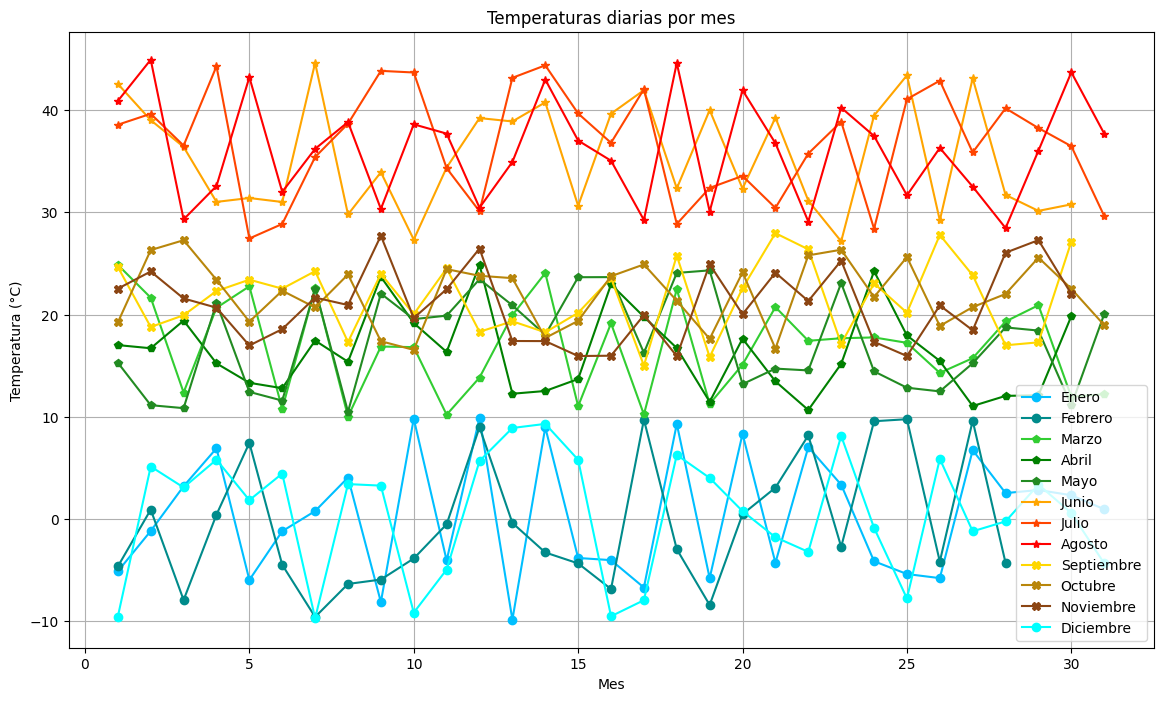

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

def generar_temperaturas_anuales():
    # Diccionario para guardar mes: lista temperaturas.
    temperaturas_mensuales = {}

    dias_por_mes = {
        1: 31, 2: 28, 3: 31, 4: 30,
        5: 31, 6: 30, 7: 31, 8: 31,
        9: 30, 10: 31, 11: 30, 12: 31
    }
    nombres_mes = {
        1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
        5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
        9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
    }

    for mes in range(1, 13):
        temperaturas = []
        # Generar temperaturas con rangos segun mes
        for _ in range(dias_por_mes[mes]):
            if mes in [1, 2, 12]:  # Invierno de 0 a 18
                temp = random.uniform(-10, 10)
            elif mes in [3, 4, 5]:  # Primavera de 10 a 25
                temp = random.uniform(10, 25)
            elif mes in [6, 7, 8]:  # Verano de 22 a 40
                temp = random.uniform(27, 45)
            else:  # Otoño de 15 a 28
                temp = random.uniform(15, 28)

            temperaturas.append(round(temp, 2))

        temperaturas_mensuales[nombres_mes[mes]] = temperaturas

    return temperaturas_mensuales


def guardar_temperaturas_en_archivo(temperaturas_mensuales, archivo):
    with open(archivo, 'w') as txt:
        for mes, temps in temperaturas_mensuales.items():
            linea = f"{mes}: " + ", ".join(map(str, temps))
            txt.write(linea + "\n")

# Generar temperaturas y escribir en ela rchivo
temperaturas = generar_temperaturas_anuales()
guardar_temperaturas_en_archivo(temperaturas, "temperaturas_por_mes.txt")

# Generar grafico.
meses = list(temperaturas.keys())
medias = [sum(temps) / len(temps) for temps in temperaturas.values()]

plt.figure(figsize=(14,8))
for mes, temps in temperaturas.items():
    dias = list(range(1, len(temps)+1))
    # Darles colores similares segun estacion
    if mes in ["Diciembre", "Enero", "Febrero"]: #Invierno
        if mes == "Enero":
            plt.plot(dias, temps, label=mes, color='deepskyblue',marker='o')
        elif mes == "Febrero":
            plt.plot(dias, temps, label=mes, color='darkcyan',marker='o')
        else:
            plt.plot(dias, temps, label=mes, color='cyan',marker='o')
    if mes in ["Marzo", "Abril", "Mayo"]: #Primavera
        if mes == "Marzo":
            plt.plot(dias, temps, label=mes, color='limegreen',marker='p')
        elif mes == "Abril":
            plt.plot(dias, temps, label=mes, color='green',marker='p')
        else:
            plt.plot(dias, temps, label=mes, color='forestgreen',marker='p')
    if mes in ["Junio", "Julio", "Agosto"]: #Verano
        if mes == "Junio":
            plt.plot(dias, temps, label=mes, color='orange',marker='*')
        elif mes == "Julio":
            plt.plot(dias, temps, label=mes, color='orangered',marker='*')
        else:
            plt.plot(dias, temps, label=mes, color='red',marker='*')
    if mes in ["Septiembre", "Octubre", "Noviembre"]: #Otoño
        if mes == "Septiembre":
            plt.plot(dias, temps, label=mes, color='gold',marker='X')
        elif mes == "Octubre":
            plt.plot(dias, temps, label=mes, color='darkgoldenrod',marker='X')
        else:
            plt.plot(dias, temps, label=mes, color='saddlebrown',marker='X')

plt.title("Temperaturas diarias por mes")
plt.xlabel("Mes")
plt.ylabel("Temperatura (°C)")

plt.legend()
plt.grid(True)

plt.show()